# Simple regression techniques in Python using NumPy

Main goal of this notebook is to explain concept of [Linear Regression](https://www.youtube.com/watch?v=zPG4NjIkCjc)<br>
<b>Linear Regression</b> - is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.<br><br>
In all the plots below, independent variable is represented by x-axis and the dependant variable is represnted by the y-axis.<br>
<b>Formulae - </b>(Change in y) / (Change in x)<br> [Better understand slope](https://www.youtube.com/watch?v=R948Tsyq4vA)

1. <b>Positive co-relation</b> - 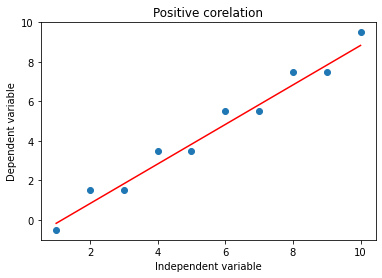

2.<b> Negative co-relation </b>- 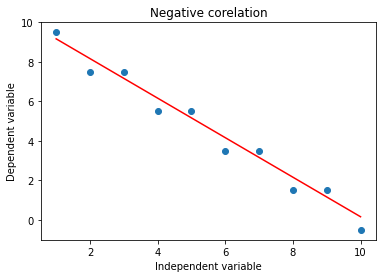

3. <b>No co-relation </b>- 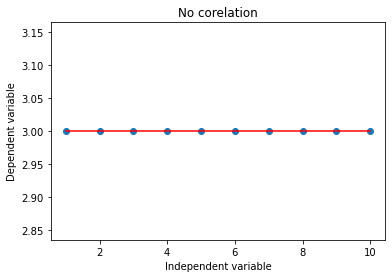

In [1]:
# Library used for reading data 
import pandas as pd

# Libarary used for Regression
import numpy as np

# Libraries used for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Reading the data

In [2]:
x = np.array([1,2,3,4,5,6,7,8,9,10])

# Random values in y
y = np.array([7,19,21,22,39,50,63,72,99,113])

print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]
[  7  19  21  22  39  50  63  72  99 113]


#### Step 2: Inserting the data into a dataframe 

In [3]:
data = pd.DataFrame([x, y])
data = data.T
data

,0,1
0,1,7
1,2,19
2,3,21
3,4,22
4,5,39
5,6,50
6,7,63
7,8,72
8,9,99
9,10,113


#### Step 3:  Scatter plot for both independent and dependent variable

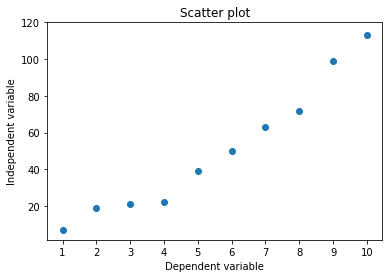

In [4]:
# Using scatter plot to plot these values w.r.t each other
plt.scatter(data[0], data[1])
plt.xlabel('Dependent variable')
plt.ylabel('Independent variable')

plt.xticks([x for x in range(1,11)])
plt.yticks([x*20 for x in range(1,7)])
plt.title('Scatter plot')

plt.show()

#### Step 4: Finding `co-relation` between the Dependent and Independent variables [Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) and fitting the regression line [Link](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

In [5]:
# Renaming the columns
data = data.rename(columns = {0 : 'Independent', 1 : 'Dependent'})
data

,Independent,Dependent
0,1,7
1,2,19
2,3,21
3,4,22
4,5,39
5,6,50
6,7,63
7,8,72
8,9,99
9,10,113


<b>2 methods for calculating the co-relation matrix</b>
1. (Dataframe).corr()
2. np. corrcoef(Independent, Dependent)

In [6]:
# By default method used to calculate co-relation in the dataframe is calculated using `pearson` method
# corr = data.corr(method='pearson')
corr = data.corr()
corr

,Independent,Dependent
Independent,1.000000,0.973628
Dependent,0.973628,1.000000


In [7]:
# For a simple regression degree is 1
reg = np.polyfit(data['Independent'], data['Dependent'], deg = 1)

# The output of the `polyfit` functions returns both slope and the y-intercept
reg

array([ 11.53333333, -12.93333333])

The output from the above equation could lead us to the equation of a line - `y =  m*x + c`. Here m(slope) is reg[0] and the y-intercept is reg[1]<br>
The final eq. would be <b>`y = 11.533*x -12.933</b><br>

Use of `np.polyval` to evaluate the polynomial at specific values

In [8]:
# We create an array to store in the predicted values for the regression line
# The input to the following method are the (reg coefficients and the independent variable)
trend = np.polyval(reg, data['Independent'])

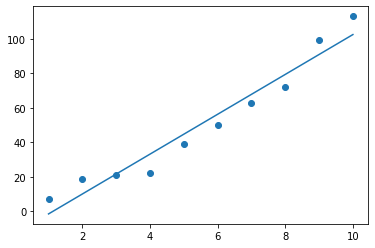

In [9]:
plt.scatter(data['Independent'], data['Dependent'])
plt.plot(data['Independent'], trend)

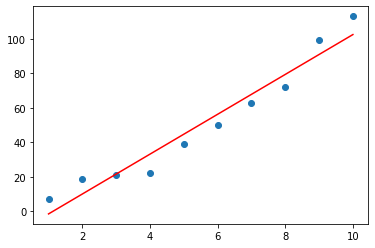

In [10]:
plt.scatter(data['Independent'], data['Dependent'])
plt.plot(data['Independent'], trend, 'r')

## Practical implementation of plotting simple regression on a sample data

In [11]:
# Reading data
data = pd.read_csv('TB1.csv')
data.head()

,DateTime,NDVI,Indikasi-NDVI,GNDVI,Indikasi-GNDVI,SAVI,Indikasi-SAVI,GCI,Indikasi-GCI,NDMI,Indikasi-NDMI,EVI,Indikasi-EVI
0,35:42.4,0.345232,Tanaman Sehat,0.040756,Tanaman Tidak Sehat,0.061132,Tanaman Tidak Sehat,0.084976,Tanaman Tidak Sehat,0.040756,Tanaman Tidak Sehat,0.220596,Tanaman Tidak Sehat
1,35:28.6,0.220218,Tanaman Tidak Sehat,0.000779,Tanaman Tidak Sehat,0.001168,Tanaman Tidak Sehat,0.001558,Tanaman Tidak Sehat,0.000779,Tanaman Tidak Sehat,0.155644,Tanaman Tidak Sehat
2,36:06.0,0.165836,Tanaman Tidak Sehat,-0.016376,Bukan Tanaman,-0.024564,Bukan Tanaman,-0.032225,Bukan Tanaman,-0.016376,Bukan Tanaman,0.125424,Tanaman Tidak Sehat
3,36:06.3,0.355801,Tanaman Sehat,0.047300,Tanaman Tidak Sehat,0.070948,Tanaman Tidak Sehat,0.099297,Tanaman Tidak Sehat,0.047300,Tanaman Tidak Sehat,0.214588,Tanaman Tidak Sehat
4,42:06.4,0.258671,Tanaman Tidak Sehat,0.002886,Tanaman Tidak Sehat,0.004328,Tanaman Tidak Sehat,0.005788,Tanaman Tidak Sehat,0.002886,Tanaman Tidak Sehat,0.157773,Tanaman Tidak Sehat


<b>1. `NDVI` - Normalized Difference Vegetation Index</b> - imagery is a method of determining crop health by measuring the index of plant “greenness” or photosynthetic activity.<br>
<b>2. `GNDVI` - Green Normalized Difference Vegetation Index - is a vegetation index for estimating photo synthetic activity and is a commonly used vegetation index to determine water and nitrogen uptake into the plant canopy.</b><br>
<b>3. `SAVI` - Soil Adjusted Vegetation Index</b> - is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low, and it outputs values between -1.0 and 1.0.<br>
<b>4. `NDMI` - Normalized Difference Moisture Index</b> - to determine vegetation water content<br>
<b>5. `EVI` - Enhanced Vegetation Index</b> - used to quantify vegetation greenness.

In [12]:
data['NDVI']

0      0.345232
1      0.220218
2      0.165836
3      0.355801
4      0.258671
         ...   
96     0.471268
97     0.060945
98     0.466293
99     0.127119
100    0.322143
Name: NDVI, Length: 101, dtype: float64

In [13]:
# Reading the data into a Dataframe
data1 = data[['NDVI', 'NDMI']]
data1

,NDVI,NDMI
0,0.345232,0.040756
1,0.220218,0.000779
2,0.165836,-0.016376
3,0.355801,0.047300
4,0.258671,0.002886
...,...,...
96,0.471268,0.080256
97,0.060945,-0.008242
98,0.466293,0.079617
99,0.127119,0.011417


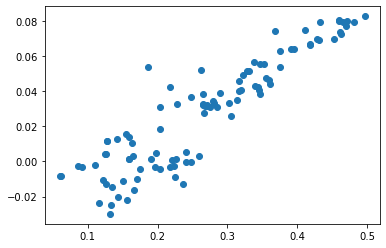

In [14]:
plt.scatter(data1['NDVI'], data1['NDMI'])

In [15]:
corr = data1.corr()
corr

,NDVI,NDMI
NDVI,1.000000,0.908422
NDMI,0.908422,1.000000


In [16]:
# Calculate slope and intercept
reg = np.polyfit(data1['NDVI'], data1['NDMI'], deg = 1)
reg

array([ 0.25072474, -0.0389978 ])

In [17]:
# for i, j in enumerate(reg):
#     reg[i] = round(j, 2)
# reg

In [18]:
# Calculating the values to be used in the best fit line
trend = np.polyval(reg, data1['NDVI'])

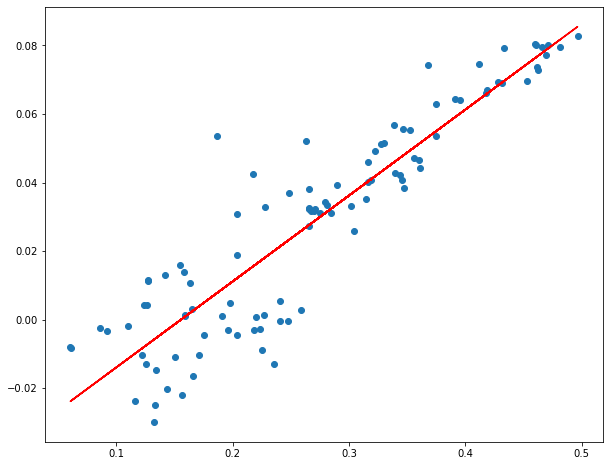

In [19]:
plt.figure(figsize=(10,8))

plt.scatter(data1['NDVI'], data1['NDMI'])
plt.plot(data1['NDVI'], trend, 'r')
# plt.legend()
plt.show()